# Analisis Prediktif dan Segmentasi Data Kanker Payudara Menggunakan Logistic Regression dan K-Means Clustering

**Tugas Besar Penambangan Data**

Kelas    : SI-47-10
Kelompok : 12

## Informasi Dataset

Dataset ini berasal dari University of Wisconsin Hospitals, Madison. Dataset ini digunakan untuk mendiagnosis kanker payudara berdasarkan fitur-fitur yang diekstraksi dari gambar digital hasil aspirasi jarum halus (Fine Needle Aspiration - FNA) dari massa payudara. Fitur-fitur tersebut menggambarkan karakteristik inti sel yang terdapat dalam gambar tersebut.

### Karakteristik Dataset
- Jumlah Instansi (Baris): 569

- Jumlah Fitur (Kolom): 30 fitur numerik

- Tipe Fitur: Numerik kontinu (real-valued)

- Nilai yang Hilang: Tidak ada

- Target (Label): Diagnosis kanker payudara:

- M = Malignant (ganas)

- B = Benign (jinak)

### Daftar Fitur
1. Radius: Rata-rata jarak dari pusat ke titik-titik pada perimeter.

2. Texture: Standar deviasi nilai skala abu-abu.

3. Perimeter: Panjang perimeter inti sel.

4. Area: Luas inti sel.

5. Smoothness: Variasi lokal dalam panjang radius.

6. Compactness: (Perimeter² / Area) - 1.0.

7. Concavity: Tingkat keparahan bagian cekung pada kontur.

8. Concave Points: Jumlah bagian cekung pada kontur.

9. Symmetry: Tingkat simetri inti sel.

10. Fractal Dimension: "Pendekatan garis pantai" - 1, mengukur kompleksitas kontur.

Dalam setiap obeservasi satu pasien FNA, dihitung 3 ukuran dari setiap fitur-fitur utama sehingga terdapat total 10 x 3 jumlah fitur.
Berikut merupakan penjelasan pengukuran yang diambil dari setiap fitur:

- **mean**: merupakan rata-rata pengukuran dari setiap sel nuclei pada gambar pasien (contoh: rata-rata radius setiap sel sampel FNA)
- **std**: Merupakan persebaran data terhadap nilai rata-rata setiap ukuran (contoh: standard deviasi radius sel sampel FNA)
- **worst**: Merupakan ukuran terburuk dalam gambar sel pasien yang diobservasi biasanya digambarkan dengan nilai paling besar (contoh: radius terburuk dari seluruh sel sampel FNA)

## Business Understanding

Tahapan ini berfokus pada penentuan objective utama dalam permasalahan yang diangkat dan bagaimana proses data mining dapat mencapai tujuan tersebut. Business understanding terbagi manjadi 5 tahapan utama yaitu
- Menentukan tujuan bisnis
- Menilai situasi saat ini
- Merumuskan masalah data mining
- Menentukan tujuan proyek
- Merencanakan proyek

### Menentukan tujuan bisnis
Tujuan utama dari permasalahan pada studi kasus ini adalah membantu meningkatkan efisiensi dan akurasi prediksi hasil diagnosis *Fine Needle Aspiration* oleh tim medis dengan mengurangi subjektifitas dan kebergantungan terhadap kemampuan individu seorang tim medis atau dokter yang memeriksa hasil FNA.

### Menilai situasi saat ini
- **Kondisi saat ini**:
Diagnosis hasil ekstraksi FNA seringkali masih dilakukan secara manual sehingga proses interpretasi bisa bervariasi tergantung kemampuan dokter.

- **Aset yang dimiliki**:
Dataset *Breast Cancer Wisconsin* yang berisi hasil FNA dengan hasil pengukuran sel yang telah diproses melalui image processing dan algoritma machine learning (Logistic Regression dan K-Means) untuk analisis pola dan klasifikasi.

### Merumuskan masalah data mining
- **Supervised Learning**:
Mengembangkan model predikfit *Binary Classification* untuk membantu proses diagnosa hasil FNA. Model ini akan dilatih menggunakan seluruh pengukuran FNA dari dataset sehingga diharapkan model mampu mempelejari pola dan menghasilkan hasil prediksi yang akurat.

- **Unsupervised Learning**:
Menggunakan algoritma K-Means untuk menemukan pola alami dalam data hasil FNA tanpa menggunakan label guna mengidentifikasi kelompok sel berdasarkan kemiripan fitur dan menemukan karakteristik fitur yang membedakan tiap cluster.

### Menentukan tujuan proyek

- **Performa Model Prediktif**:
Keberhasilan model diukur menggunakan beberapa metrik pengukuran dengan target akurasi prediksi model pada set uji melebihi **90%**. Selain akurasi, dipertimbangkan juga akurasi model menggunakan precision, recall, f1-score, confusion matrix, dan ROC AUC curve sebagai metrik pembanding lainnya untuk memastikan performa yang konsisten dan tidak terjadi overfitting.

- **Hasil Klasterisasi**
Keberhasilan hasil klasterisasi diukur menggunakan metrik silhouette score. Selain itu akan dibandingkan juga klaster yang terbuat dengan label asli untuk analisa apakah sel Benign dan Malignant memang terpisah secara alami. Akan dilakukan juga analisa karakteristik fitur dari klaster yang terbuat untuk mengidentifikasi karakteristik yang membedakan hasil klasterisasi.

### Merencanakan proyek

- Fase pengumpulan data akan menggunakan data yang didapatkan dari hasil image processing FNA yang dilakukan oleh tim University of Wisconsin.
- Akan dilakukan tahapan data understanding untuk eksplorasi seluruh fitur numerik
- Data preparation dilakukan untuk mempersiapkan data sebelum proses modeling
- Classification dilakukan untuk pelatihan model *Binary Classification* menggunakan algoritma Logistic Regression
- Clustering dilakukan untuk memisahkan data menjadi klaster menggunakan algoritma K-Means
- Interpretasi dilakukan untuk menganalisa hasil modeling
- Deployment dilakukan untuk menyajikan hasil proyek yang dapat digunakan oleh end user

## Data Understanding

Sebelum melakukan analisa lebih dalam, tahap pertama yang harus dilakukan adalah melakukan eksplorasi terhadap dataset yang akan digunakan.

Import dataset dilakukan menggunakan library bawaan dari sumber dataset UCI Machine Learning Repository

In [33]:
## Import dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

### Memeriksa informasi dataset

Bagian ini dilakukan untuk memeriksa struktur dataset dan tipe data dalamd dataset.

In [34]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Penamaan setiap fitur masing menggunakan anotasi angka yang kurang bermakna seperti radius1 (mean), radius2 (std), radius3 (worst). Kita akan mengubah nama kolom feature terlebih dahulu untuk memudahkan analisa

In [35]:
X.columns = [column.replace('1', '_mean').replace('2', '_std').replace('3', '_worst') for column in X.columns]

columns = X.columns
columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std', 'texture_std', 'perimeter_std', 'area_std',
       'smoothness_std', 'compactness_std', 'concavity_std',
       'concave_points_std', 'symmetry_std', 'fractal_dimension_std',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
print(f"Shape dataframe fitur: {X.shape}")
print(f"Shape dataframe target: {y.shape}")

Shape dataframe fitur: (569, 30)
Shape dataframe target: (569, 1)


Setelah melakukan import, kita dapat melihat bahwa fitur dataset terdiri dari 569 row (instance) data dan 30 fitur beserta jumlah row target yang sama yaitu 569.

In [37]:
# Melihat informasi feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_std               569 non-null    float64
 11  texture_std              569 non-null    float64
 12  perimeter_std            569 non-null    float64
 13  area_std                 569 non-null    float64
 14  smoothness_std           5

In [38]:
# Melihat informasi target
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


Berdasarkan informasi tersebut, kita dapat melihat bahwa seluruh fitur dataset memiliki tipe data numeric yaitu float. Ini sesuai dengan deskripsi resmi dari halaman dataset yaitu data merupakan hasil pengukuran sel yang didapatkan menggunakan teknik *Fine Needle Aspiration*. Selain fitur numeric, target atau label dataset memiliki tipe data object yang berisikan label klasifikasi jenis tumor M (ganas) dan B (jinak)

### Memeriksa duplikasi data

Setelah memeriksa tipe data, selanjutnya kita akan melakukan tahap pemeriksaan duplikasi data. Pengecekan duplikasi data merupakan tahapan yang penting karena data yang duplikat dapat menghasilkan bias dan merubah distribusi data sehingga menghasilkan hasil analisis yang kurang akurat

In [39]:
# Memeriksa duplikasi data pada fitur

X.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset yang digunakan

### Memeriksa null value
Penanganan nilai hilang merupakan salah satu tahapan yang paling penting. Nilai hilang pada dataset dapat mempengaruhi hasil prediksi dan analisis secara signifikan karena beberapa hal berikut: 
- Bias pada dataset
- Mempengaruhi algoritma machine learning
- Kualitas data yang buruk menghasilkan hasil prediksi yang buruk

Berdasarkan informasi resmi dari halaman dataset tidak terdapat nilai hilang. Tapi tahapan ini penting dilakukan untuk memastikan kualitas data yang akan digunakan

In [40]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_std               569 non-null    float64
 11  texture_std              569 non-null    float64
 12  perimeter_std            569 non-null    float64
 13  area_std                 569 non-null    float64
 14  smoothness_std           5

(None, None)

Kita dapat melihat bahwa seluruh fitur memiliki count row data yang konsisten sebanyak 569 row.

In [41]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_std                 0
texture_std                0
perimeter_std              0
area_std                   0
smoothness_std             0
compactness_std            0
concavity_std              0
concave_points_std         0
symmetry_std               0
fractal_dimension_std      0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
y.isnull().sum()

Diagnosis    0
dtype: int64

Tidak terdapat nilai hilang pada dataset.

### Memeriksa ukuran statistik seluruh fitur dataset
Bagian ini dilakukan untuk melihat ukuran statistik seperti nilai pusat dan sebaran masing masing fitur

In [43]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Selanjutnya kita akan memeriksa distribusi masing-masing fitur

In [44]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

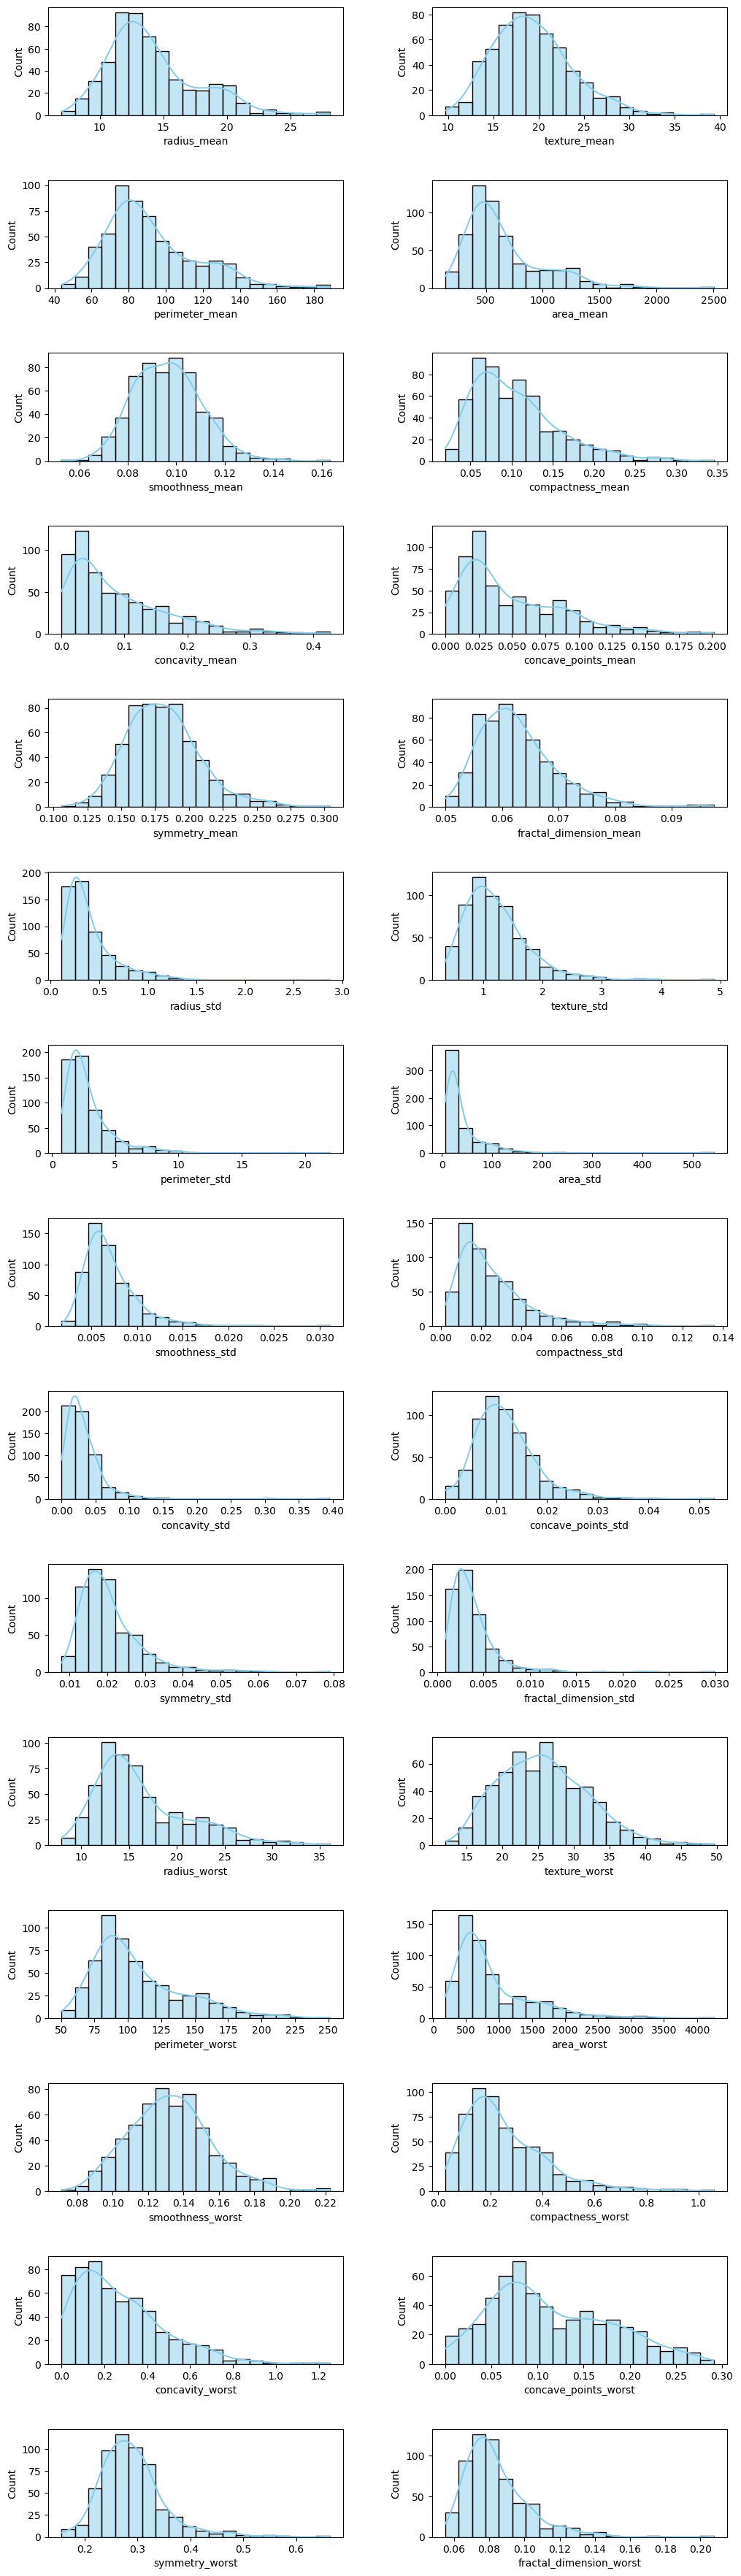

In [45]:
columns = X.columns
n_bins = 20

fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel() 

for i, column in enumerate(columns):
    sns.histplot(X[column], bins=n_bins, ax=axs[i], color='skyblue', kde=True)
    
plt.show()

### Pemeriksaan Outlier
Kita akan melakukan pemeriksaan outlier dengan visualisasi boxplot untuk setiap fitur dalam dataset.

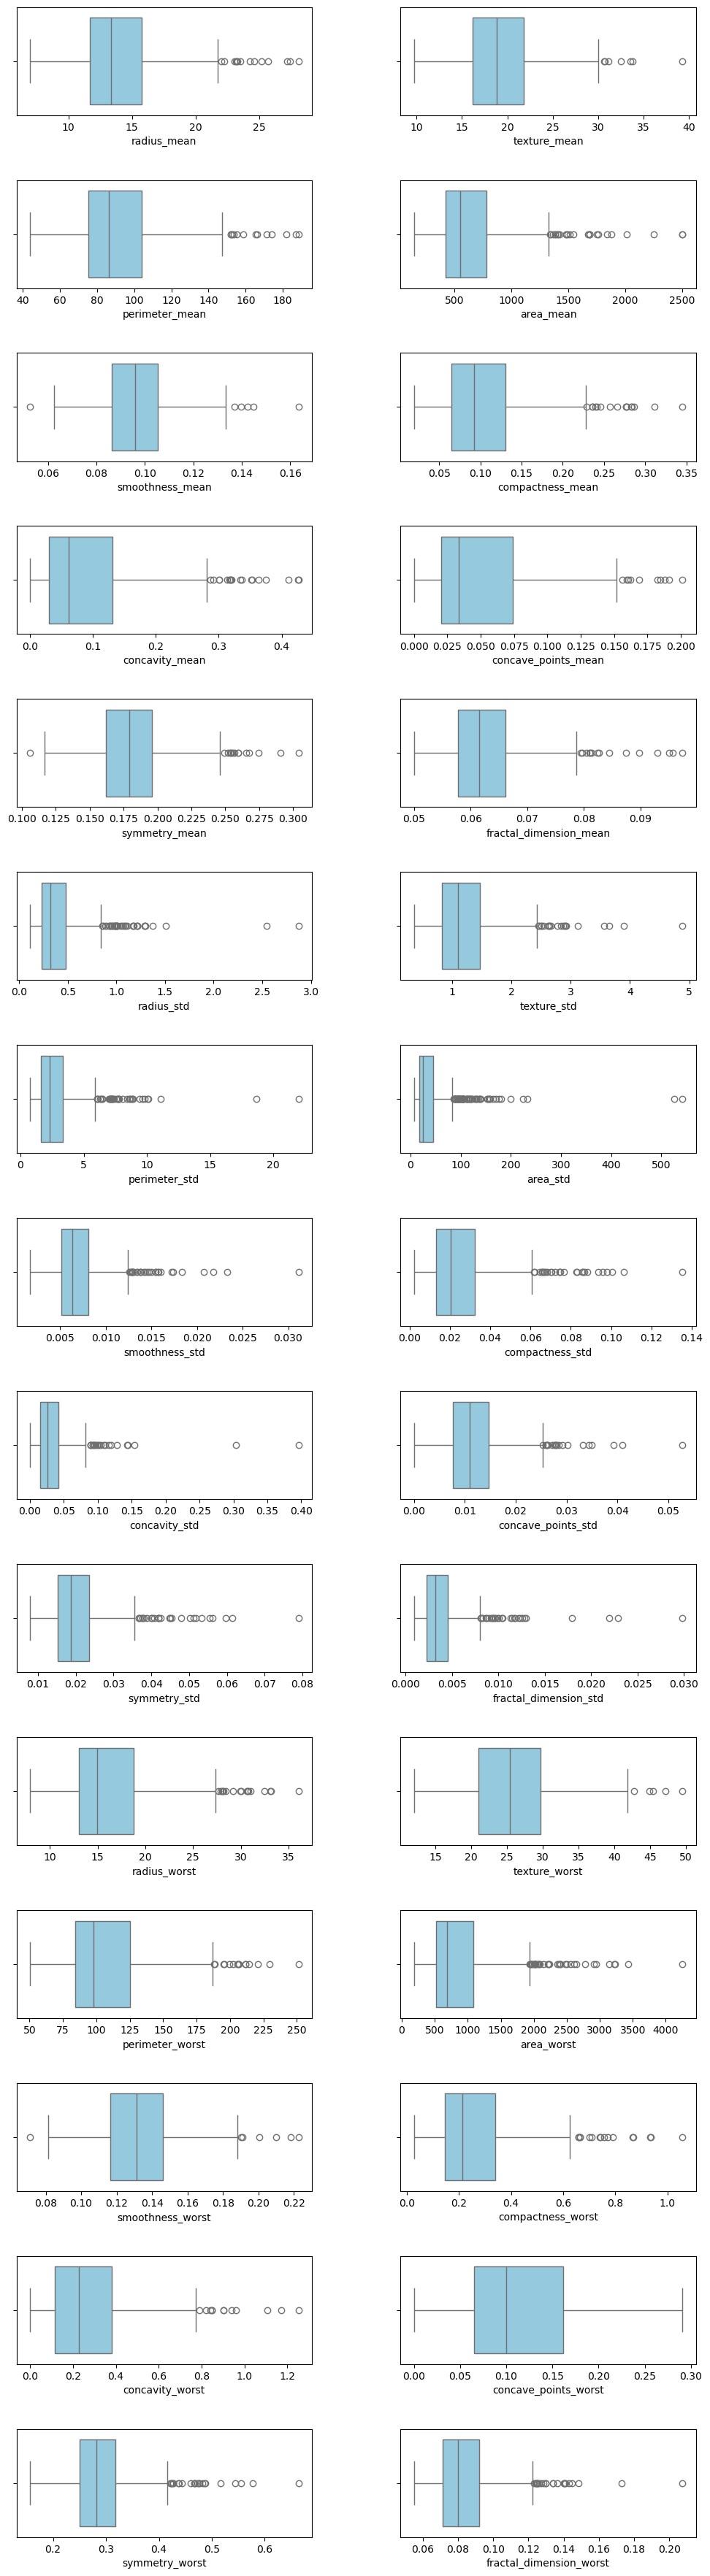

In [46]:
fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel()

for i, column in enumerate(columns):
    sns.boxplot(x=X[column], ax=axs[i], color='skyblue')
    
plt.show()

Berdasarkan hasil visualisasi boxplot, kita dapat melihat masih terdapat outlier yaitu data yang terdapat di luar *whiskers* dari boxplot.

In [47]:
outlier_summary = {}

for column in columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
    feature_mean = X[column].mean()
    outlier_diff = abs(outliers[column] - feature_mean)

    outlier_summary[column] = {
        'feature_mean': feature_mean,
        'num_outliers': outliers.shape[0],
        'outlier_values': outliers[column].values,
        'difference_from_mean': outlier_diff.values
    }


for column, info in outlier_summary.items():
    print(f"{column}\n\nMean: {info['feature_mean']:.2f}")
    print(f"Jumlah outlier: {info['num_outliers']}")
    if info['num_outliers'] > 0:
        print(f"Outlier values: {info['outlier_values']}")
        print(f"Selisih dari mean: {info['difference_from_mean']}")
    print("=" * 50 + '\n')

radius_mean

Mean: 14.13
Jumlah outlier: 14
Outlier values: [25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]
Selisih dari mean: [11.09270826  8.14270826 10.12270826  9.14270826 13.09270826  9.16270826
 13.98270826  9.08270826  9.38270826 11.60270826  7.88270826 13.29270826
  8.96270826 10.50270826]

texture_mean

Mean: 19.29
Jumlah outlier: 7
Outlier values: [32.47 33.81 39.28 33.56 31.12 30.72 30.62]
Selisih dari mean: [13.18035149 14.52035149 19.99035149 14.27035149 11.83035149 11.43035149
 11.33035149]

perimeter_mean

Mean: 91.97
Jumlah outlier: 13
Outlier values: [171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]
Selisih dari mean: [79.53096661 60.83096661 74.23096661 60.13096661 90.13096661 66.93096661
 96.53096661 61.53096661 63.13096661 82.23096661 94.93096661 60.13096661
 73.53096661]

area_mean

Mean: 654.89
Jumlah outlier: 25
Outlier values: [1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 

Berdasarkan hasil analisis tersebut, terdapat beberapa fitur yang memiliki outlier cukup banyak dan cukup jauh nilainya dari nilai mean fitur. Kita juga dapat melihat bahwa fitur yang memiliki nilai outlier yang cukup banyak dan ekstrem memiliki distrubusi data right-skewed. Untuk meningkatkan performa model prediktif, maka kita akan menggunakan Robust Scaler untuk mengurangi efek outlier dan menggunakan StandardScaler untuk membuat nilai data berkisar antara 0 dan 1 sehingga memudahkan proses algoritma K-Means.

Robust Scaler melakukan scaling menggunakan **median** dan **interquartile range (IQR)** untuk mengurangi pengaruh outlier.

$$
x_{\text{scaled}} = \frac{x - \text{median}(X)}{\text{IQR}(X)}
$$

Standard Scaler melakukan transformasi data menggunakan rumus berikut: 

$$
z = \frac{x - \mu}{\sigma}
$$

### Melihat korelasi data

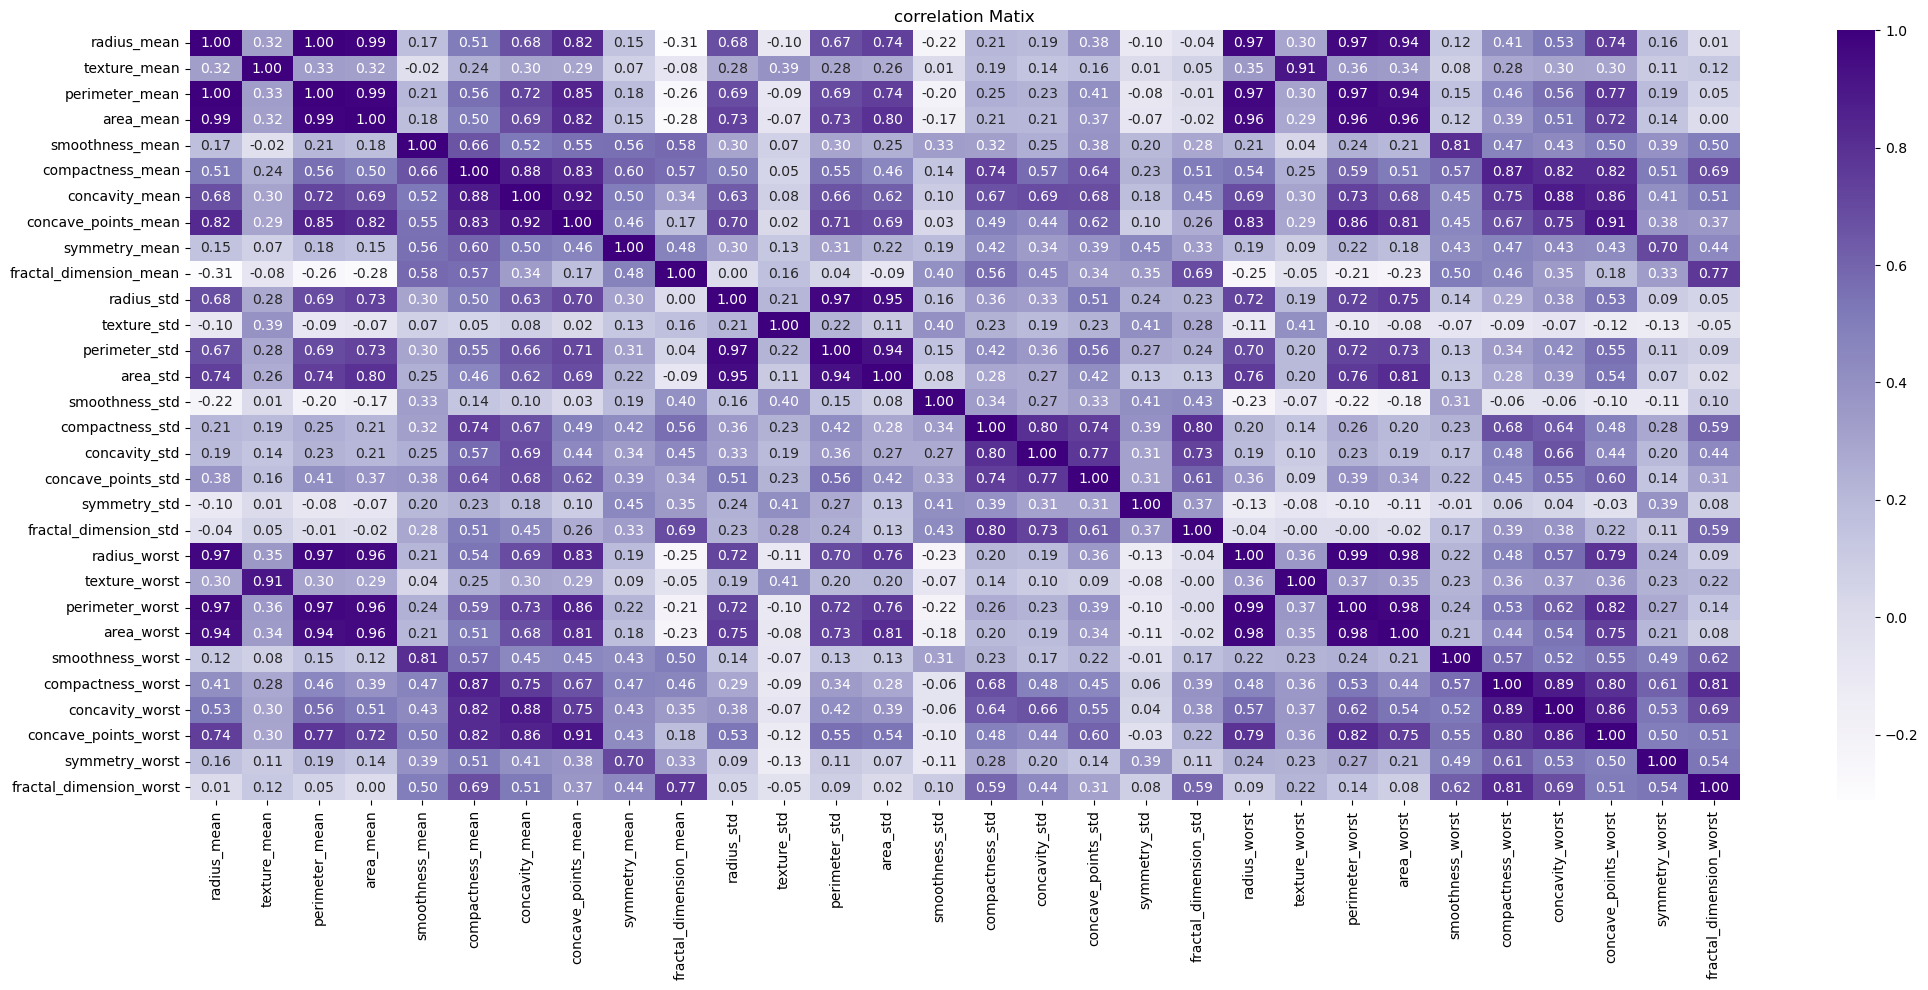

In [48]:
plt.figure(figsize=(25, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

## Data Preprocessing

Setelah memahami dataset yang akan digunakan, selanjutnya kita akan melakukan preprocessing terhadap dataset sampai dengan pemisahan dataset menjadi train dan test set.

### Mapping target
Seperti yang kita lihat pada tahap sebelumnya, dataset masih memiliki target dengan tanda 'M' untuk malignant dan 'B' untuk Benign. Pada tahap ini, dilakukan mapping value menjadi numeric untuk mempermudah pelatihan model

In [49]:
y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

C:\Users\ANAKING FAIQAL LUFI\AppData\Local\Temp\ipykernel_4244\2042718244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})


In [50]:
y['Diagnosis'].info(), y['Diagnosis'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: Diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


(None, array([1, 0], dtype=int64))

Sekarang seluruh nilai pada target sudah bertipe data numeric sehingga target sudah siap untuk digunakan

### Split dataset

Sekarang kita sudah memiliki dataframe feature dan target, sebelum melakukan modeling tahapan selanjutnya adalah split dataset. Kita akan menggunakan 80/20 split train test menggunakan library sklearn

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

### Scaling Fitur

Setelah dataset displit menjadi data train dan test, selanjutnya kita akan menerapkan scaling terhadap data yang kita miliki

In [52]:
from sklearn.preprocessing import RobustScaler

In [53]:
scaler = RobustScaler()

# Robust Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mari kita lihat data yang sudah dilakukan transformasi scaling

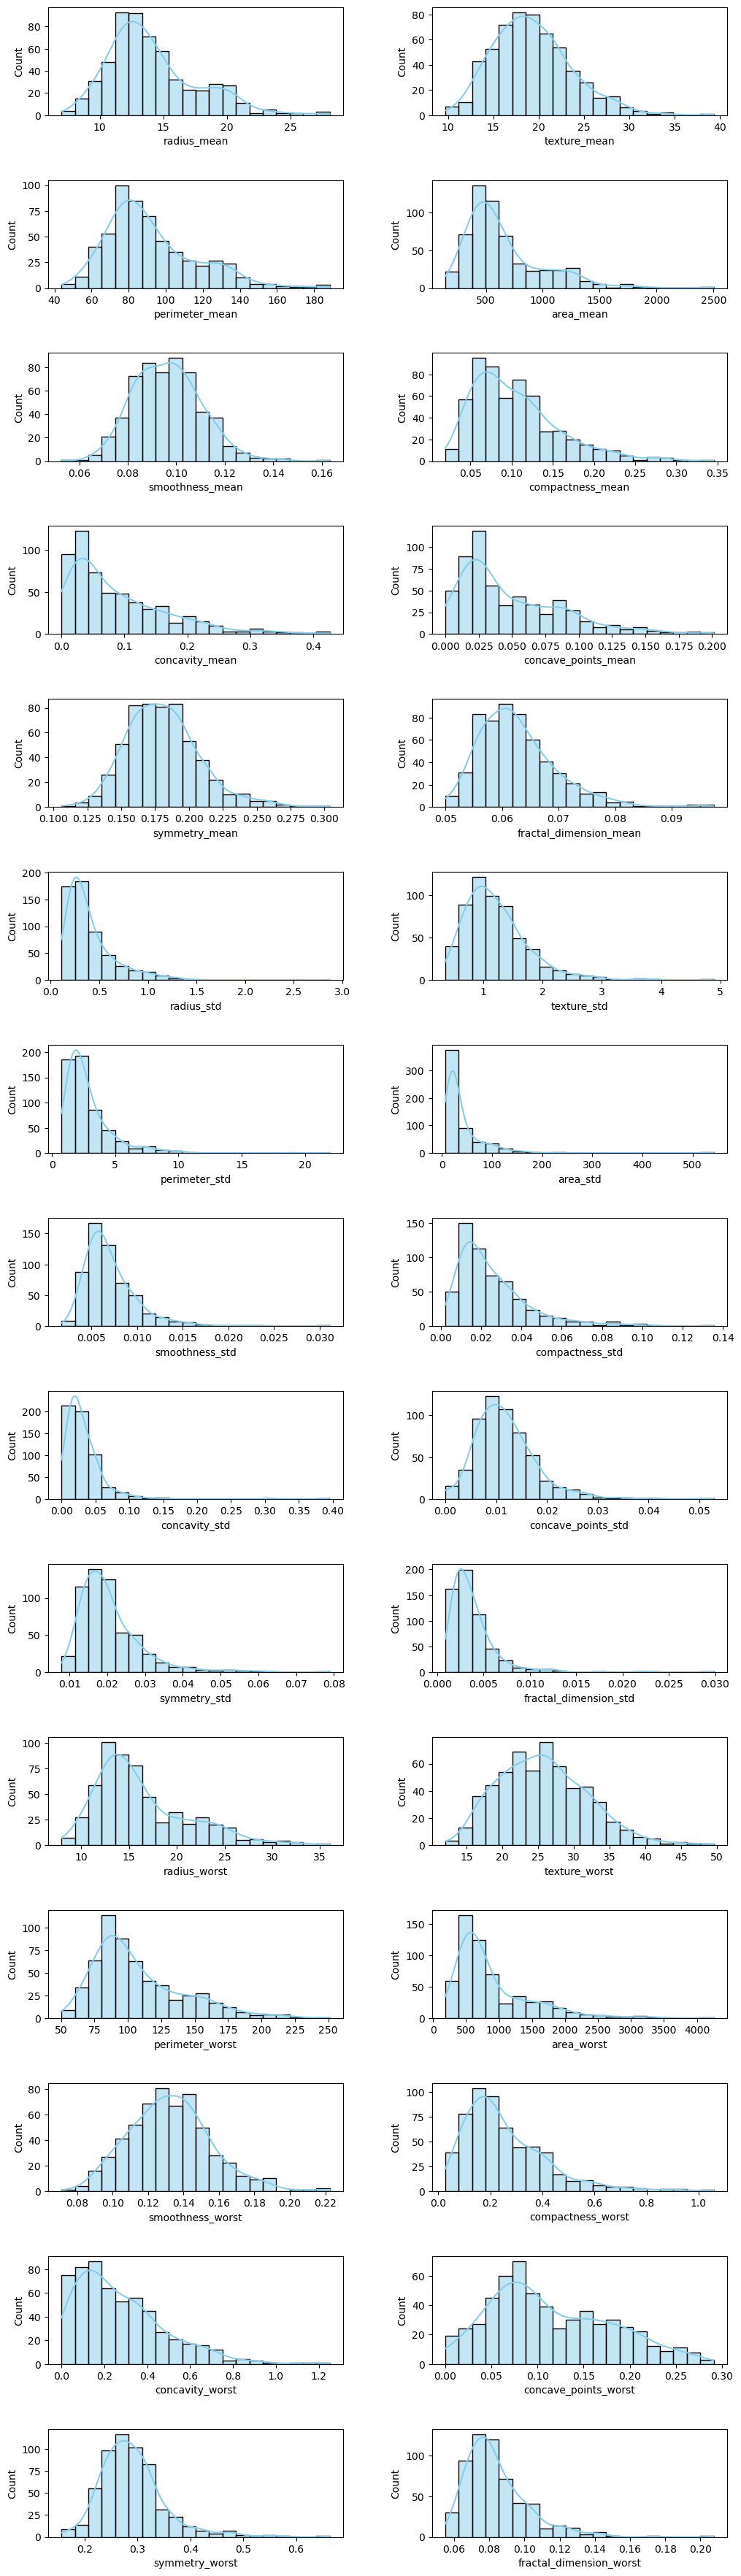

In [54]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i+1}' for i in range(X_train.shape[1])]

X_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

columns = X_scaled_df.columns
n_bins = 20

fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel() 

for i, column in enumerate(columns):
    sns.histplot(X[column], bins=n_bins, ax=axs[i], color='skyblue', kde=True)
    
plt.show()

## Modeling - Classification

Pada bagian ini akan dilakukan penerapan teknik modeling machine learning menggunakan algoritma Logistic Regression terhadap data yang sudah melalui tahapan preprocessing

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=1000, solver='liblinear')

Model sudah dilatih, kita akan membuat prediksi dan lihat performa model

In [56]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [57]:
# Import metrics untuk prediksi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Evaluasi Model Classification

Melihat skor akurasi

In [58]:
print(f"Test Accuracy  (RobustScaler): {accuracy_score(y_test, y_pred_test)*100:.4f}%")

Test Accuracy  (RobustScaler): 99.1228%


Melihat confusion matrix

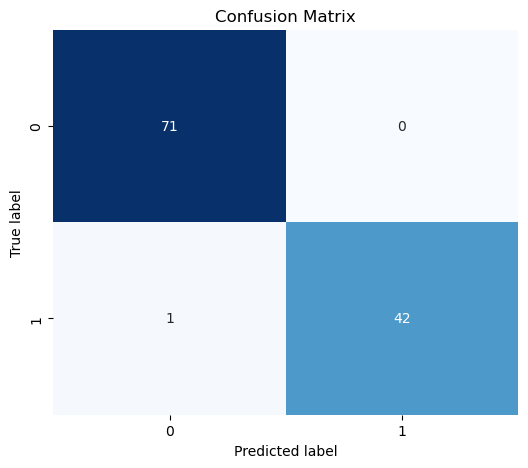

In [59]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan hasil confusion matrix, kita dapat melihat bahwa model sudah mampu mengklasifikasi seluruh data **Benign** dengan benar pada test set dan masih terdapat prediksi false negative (diprediksi benign namun aslinya malignant).

Melihat hasil klasifikasi

In [60]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Selanjutnya kita akan mlakukan evaluasi menggunakan roc auc curve

AUC: 0.9980


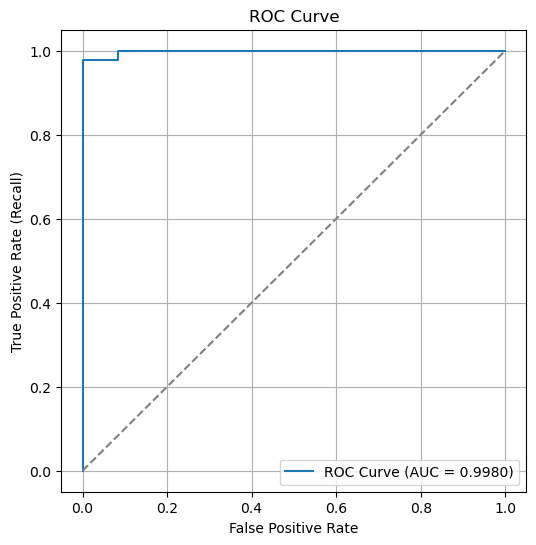

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Hitung AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()

### Tuning model

Meskpun model sudah memiliki performa yang cukup baik, pada bagian ini kita akan melakukan tuning model untuk melihat apakah model masih bisa ditingkatkan lagi

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


clf_log = LogisticRegression(solver='liblinear', max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced'] 
}

Lakukan pencarian hyperparameter tuning

In [63]:
grid_search = GridSearchCV(clf_log, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

Lihat hasil paramter terbaik

In [64]:
print("Best params:", grid_search.best_params_)
print(f"Best AUC: {grid_search.best_score_:.4f}")

Best params: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
Best AUC: 0.9946


Ambil best model

In [65]:
best_model = grid_search.best_estimator_

### Membandingkan best model dan model pertama

Pada bagian ini kita akan bandingkan kinerja model pertama dan setelah tuning pada beberapa metrics

Bandingkan skor akurasi

In [66]:
base_model_pred = model.predict(X_test_scaled)
best_model_pred = best_model.predict(X_test_scaled)

print(f"Test Accuracy base model: {accuracy_score(y_test, base_model_pred)*100:.4f}%")
print(f"Test Accuracy best model: {accuracy_score(y_test, best_model_pred)*100:.4f}%")

Test Accuracy base model: 99.1228%
Test Accuracy best model: 99.1228%


Kita dapat melihat bahwa tidak ada perubahan pada skor akurasi. Jika ada mungkin perubahan yang terjadi sangat kecil

Bandingkan roc auc

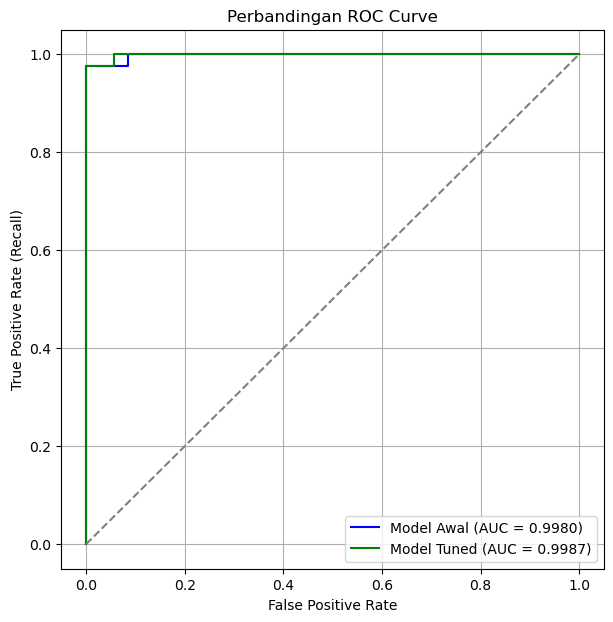

In [67]:
y_pred_prob1 = model.predict_proba(X_test_scaled)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
auc1 = roc_auc_score(y_test, y_pred_prob1)

y_pred_prob2 = best_model.predict_proba(X_test_scaled)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
auc2 = roc_auc_score(y_test, y_pred_prob2)

plt.figure(figsize=(7, 7))
plt.plot(fpr1, tpr1, label=f"Model Awal (AUC = {auc1:.4f})", color='blue')
plt.plot(fpr2, tpr2, label=f"Model Tuned (AUC = {auc2:.4f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Perbandingan ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Teradapat peningkatan pada nilai area under the curve (AUC) mesikpun sangat sedikit. Hyperparameter tuning membuat model lebih baik sedikit dalam memisahkan kelas.

Selanjutnya kita bandingkan confusion matrix base model dan best model

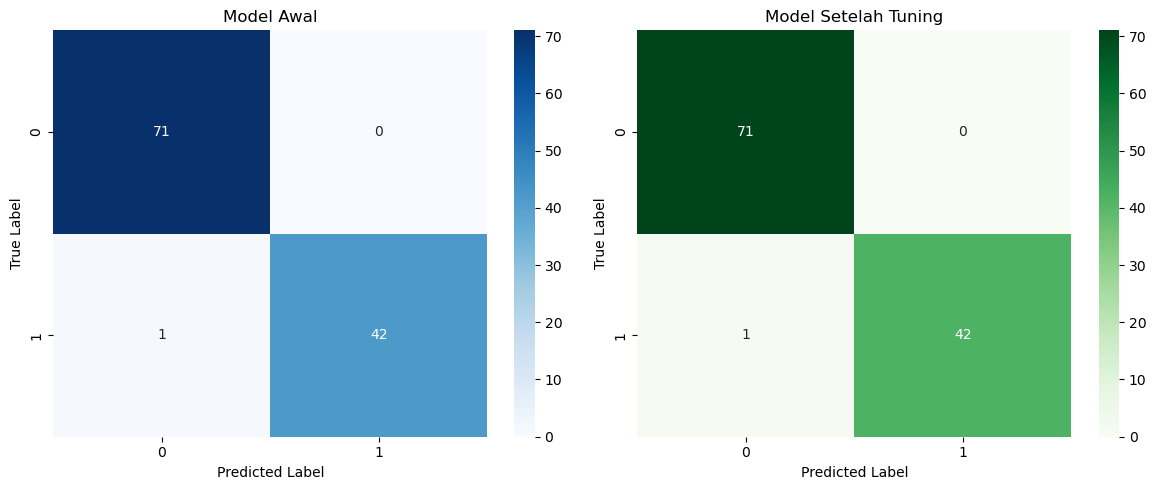

In [68]:
cm1 = confusion_matrix(y_test, base_model_pred)
cm2 = confusion_matrix(y_test, best_model_pred)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Model Awal")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Model Setelah Tuning")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

Tidak ada perbedaan pada hasil prediksi

Bandingkan hasil classification report

In [69]:
print("Model awal")
print(classification_report(y_test, base_model_pred))

print("Model tuned")
print(classification_report(y_test, best_model_pred))

Model awal
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Model tuned
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Tidak ada perbedaan signifikan juga pada hasil classification report.

In [70]:
# Simpan model
import joblib

joblib.dump(best_model, 'clf_model_breast_cancer.pkl')

['clf_model_breast_cancer.pkl']

**Kesimpulan**: Model Logistic Regression sudah cukup baik untuk dilatih pada kasus klasifikasi dataset ini. Setelah dilakukan tuning model, hanya terdapat sedikit peningkatan yaitu pada bagian skor AUC antara model awal dan tuned. Ini menunjukan bahwa model awal sudah cukup capable. Tetapi dengan hyperparameter tuning, model masih dapat mengalami peningkatan performa

## Modeling - Clustering

Pada bagian ini akan dilakukan pemodelan klasterisasi menggunakan algoritma K-Means. Beberapa tahapan yang harus dilakukan sebelum modeling adalah mencari jumlah klaster menggunakan metode WCSS dan juga menerapkan scaling data jika perlu. Hasil klasterisasi akan digunakan untuk menginterpretasikan karakteristik kelas Benign dan Malignant menggunakan statistika deskriptif

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [72]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Scaling feature

Algoritma K-Means lebih baik bekerja menggunakan data yang memiliki skala yang konsisten. Kita bisa melihat bahwa dataset ini memiliki nilai skala yang tidak konsisten seperti perbedaan nilai pada kolom smoothness dan area yang memiliki rentang nilai yang cukup jauh.

In [121]:
from sklearn.decomposition import PCA

In [130]:
scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

### Menemukan jumlah klaster menggunakan WCSS

Salah satu teknik yang umum digunakan untuk menemukan jumlah klaster yang optimal adalah elbow method. Pada bagian ini akan dilakukan analisa jumlah klaster optimal menggunakan elbow method

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

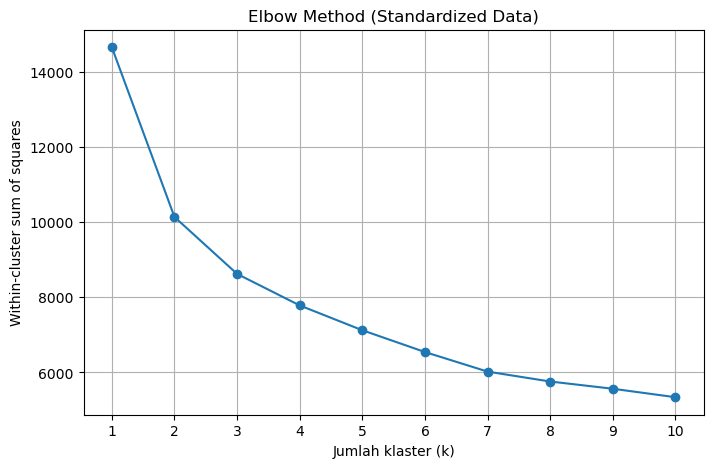

In [132]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Standardized Data)')
plt.xlabel('Jumlah klaster (k)')
plt.ylabel('Within-cluster sum of squares')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Berdasarkan hasil visualisasi tersebut, kita dapat melihat bahwa klaster 2 adalah titik dimana penurunan inertia (wcss) mulai melambat. Untuk itu kita akan menentukan klaster dengan jumlah 2 sebagai jumlah klaster optimal

Pada bagian ini juga kita bandingkan nilai silhouette score sepajang klaster untuk menenetukan klaster terbaik

### Pelatihan model

Pada bagian ini akan dilakukan pelatihan model untuk analisa klaster pada dataset. Jumlah klaster yang akan digunakan adalah 2 sesuai dengan hasil analisa elbow method.

C:\Dev\tools\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Dev\tools\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Dev\tools\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Dev\tools\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

k=2, Silhouette Score=0.5462
k=3, Silhouette Score=0.2091
k=4, Silhouette Score=0.1917
k=5, Silhouette Score=0.1240
k=6, Silhouette Score=0.1034
k=7, Silhouette Score=-0.0191
k=8, Silhouette Score=-0.0238
k=9, Silhouette Score=-0.0545
k=10, Silhouette Score=-0.1017


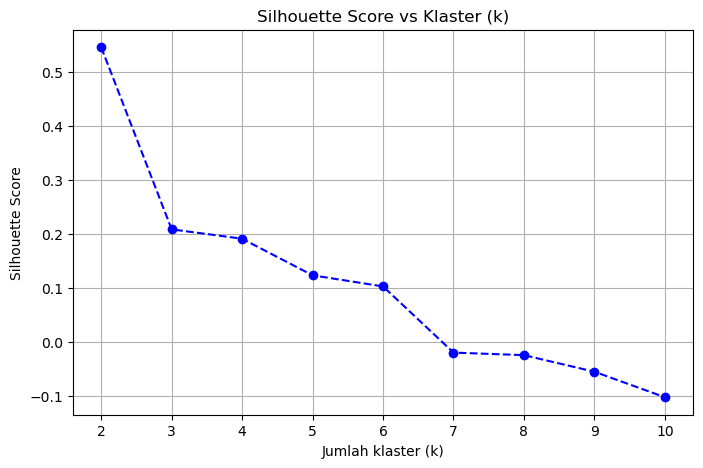

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(X, X_scaled, k_min=2, k_max=10):
    silhouette_scores = []
    k_values = range(k_min, k_max + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        print(f"k={k}, Silhouette Score={score:.4f}")

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='blue')
    plt.title("Silhouette Score vs Klaster (k)")
    plt.xlabel("Jumlah klaster (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()

plot_silhouette_scores(X, X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

y_kmeans = kmeans.fit_predict(X_scaled)

Sekarang model sudah dilakuakn fit, selanjutnya akan dilakukan visualisasi klaster. Namun sebelum itu akank dilkakuan reduksi dimensi terlebih dahulu untuk memudahkan visualisasi ke dalam 2 dimensi

In [136]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame()
df_plot['PCA1'] = X_pca[:, 0]
df_plot['PCA2'] = X_pca[:, 1]
df_plot['Cluster'] = y_kmeans.astype(str)

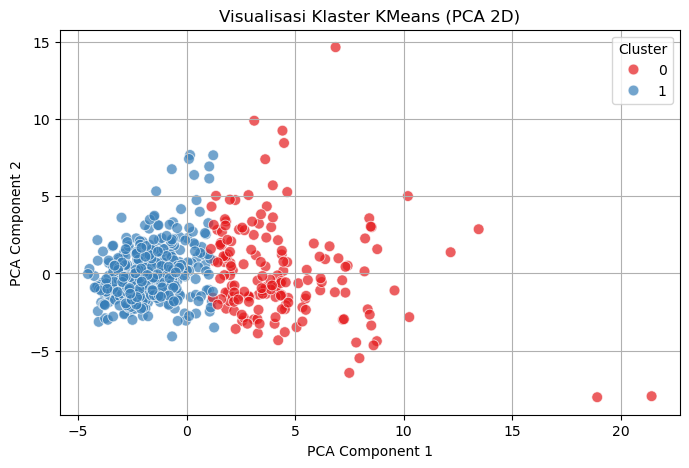

In [137]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60, alpha=0.7)
plt.title('Visualisasi Klaster KMeans (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Hasil klasterisasi menunjukan bahwa terdapat dua kluster yang terpisah di mana satu klaster lebih berkumpul di sebelah kiri dan satu klaster lagi memiliki nilai yang lebih tersebar.

In [138]:
# Melihat Silhouette Score hasil klasterisasi
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.5462060092858235


Kita dapat melihat bahwa hasil klasterisasi menghasilkan silhouette score sebesar 0.34. Silhouette score ini mengartikan bahwa ada klaster yang teridentifikasi namun masih ada tumpang tindih antar klaster. Hal mungkin bisa terjadi karena data medis yang digunakan memiliki fitur yang saling overlap. Untuk itu, kita akan melakukan analisa lebih lanjut.

In [139]:
y_true = pd.Series(y.values.ravel())

acc1 = accuracy_score(y_true, y_kmeans)
acc2 = accuracy_score(y_true, 1 - y_kmeans)

if acc1 > acc2:
    best_pred = y_kmeans
    cm = confusion_matrix(y_true, y_kmeans)
    acc = acc1
else:
    best_pred = 1 - y_kmeans
    cm = confusion_matrix(y_true, 1 - y_kmeans)
    acc = acc2


print("Confusion Matrix:")
print(cm)
print(f"Akurasi Clustering terhadap label asli: {acc*100:.4f}%")

Confusion Matrix:
[[351   6]
 [ 52 160]]
Akurasi Clustering terhadap label asli: 89.8067%


Pada hasil analisa klaster dan label asli, pertama dilakukan perbandingan nilai akurasi antara label kmeans dan label asli dataset. Karena label kmeans belum tentu memiliki anotasi label yang sama seperti label asli, maka dilakukan perbandingan antara 2 skor akurasi dengan membalik nilai label kmeans. Akurasi yang paling tinggi akan dipilih sebagai anotasi label kemeans yang cocok dengan label asli. Di sini kita bisa melihat bahwa anotasi kluster kmeans memiliki akurasi 90% jika dibandingkan label asli.

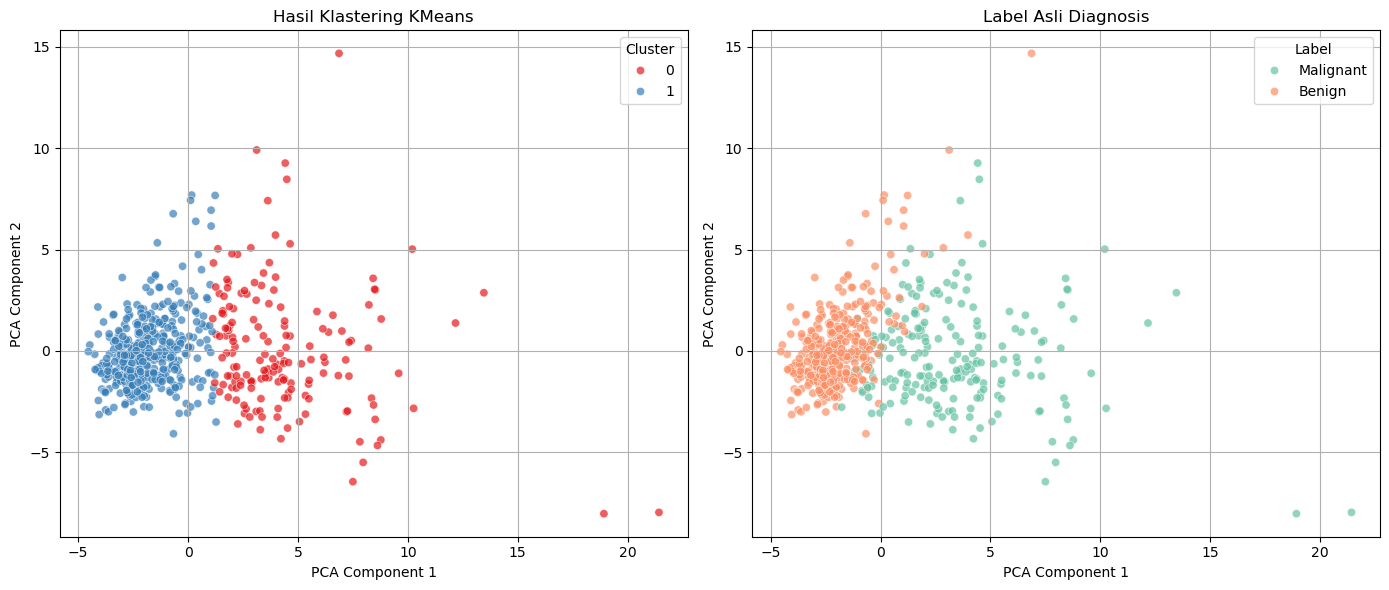

In [140]:
df_plot['True Label'] = y_true.map({0: 'Benign', 1: 'Malignant'}) 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    data=df_plot, x='PCA1', y='PCA2', hue='Cluster',
    palette='Set1', alpha=0.7, ax=axes[0]
)
axes[0].set_title('Hasil Klastering KMeans')
axes[0].legend(title='Cluster')

sns.scatterplot(
    data=df_plot, x='PCA1', y='PCA2', hue='True Label',
    palette='Set2', alpha=0.7, ax=axes[1]
)
axes[1].set_title('Label Asli Diagnosis')
axes[1].legend(title='Label')

for ax in axes:
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.grid(True)

plt.tight_layout()
plt.show()

Berdasarkan hasil perbandingan ini, kita dapat melihat bahwa model KMeans berhasil memisahkan kelas data dengan cukup akurat. Kita juga dapat melihat bahwa kelas Malignant tampaknya memiliki data yang lebih tersebar dibandingkan kelas Benign. Untuk menginterpretasikan karakteristik fitur, kita akan membandingkan karakteristik statistik fitur dari kedua kelas atau klaster untuk menentukan kira-kira apa yang membedakan antara kelas benign dan malignant.

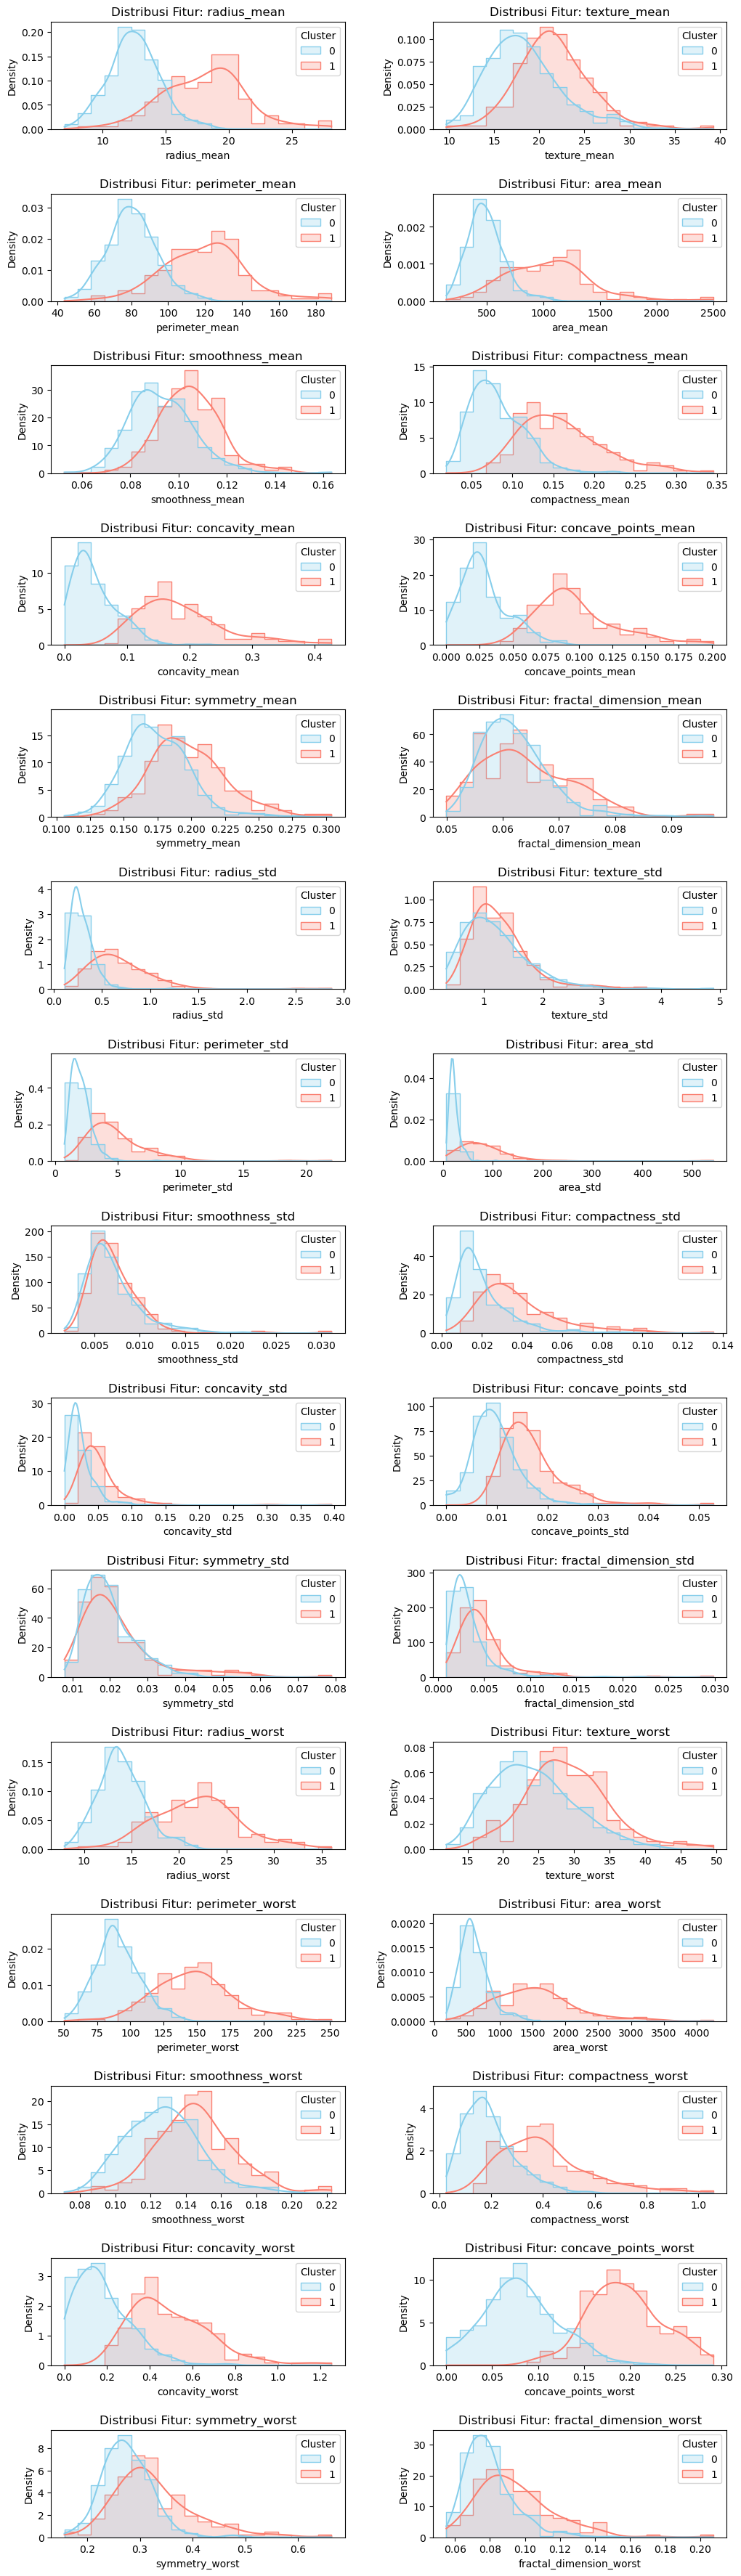

In [141]:
columns = X.columns
n_bins = 20

fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel()

df_clustered = X.copy()
df_clustered['Cluster'] = best_pred

for i, column in enumerate(columns):
    sns.histplot(
        data=df_clustered,
        x=column,
        hue='Cluster',
        bins=n_bins,
        ax=axs[i],
        kde=True,
        palette=['skyblue', 'salmon'],
        element='step', 
        stat='density',
        common_norm=False
    )
    axs[i].set_title(f'Distribusi Fitur: {column}')

plt.show()

**Kesimpulan**: Berdasarkan hasil visualisasi histogram distribusi fitur terhadap klaster yang terbentuk dari algoritma KMeans, ditemukan perbedaan karakteristik yang cukup mencolok antara klaster yang didominasi oleh data benign dan malignant. Secara umum, klaster benign (Cluster 0) menunjukkan distribusi yang cenderung lebih ramping (*thin bell curve*) dan condong ke arah nilai yang lebih rendah pada sebagian besar fitur seperti area, radius, dan texture. Hal ini mengindikasikan bahwa sel-sel benign cenderung memiliki ukuran dan tekstur yang lebih kecil serta lebih seragam. Sebaliknya, klaster malignant (Cluster 1) memperlihatkan kurva distribusi yang lebih lebar dan tersebar, menunjukkan adanya variasi yang lebih besar pada nilai-nilai fitur. Distribusi yang menyebar ini dapat merefleksikan karakteristik sel kanker ganas yang umumnya memiliki ukuran yang lebih besar, bentuk yang lebih kompleks, dan tingkat heterogenitas yang lebih tinggi.

Perbedaan ini memperkuat dugaan bahwa hasil klasterisasi KMeans telah berhasil memisahkan data ke dalam kelompok dengan karakteristik yang mencerminkan kondisi biologis yang berbeda antara sel benign dan malignant.

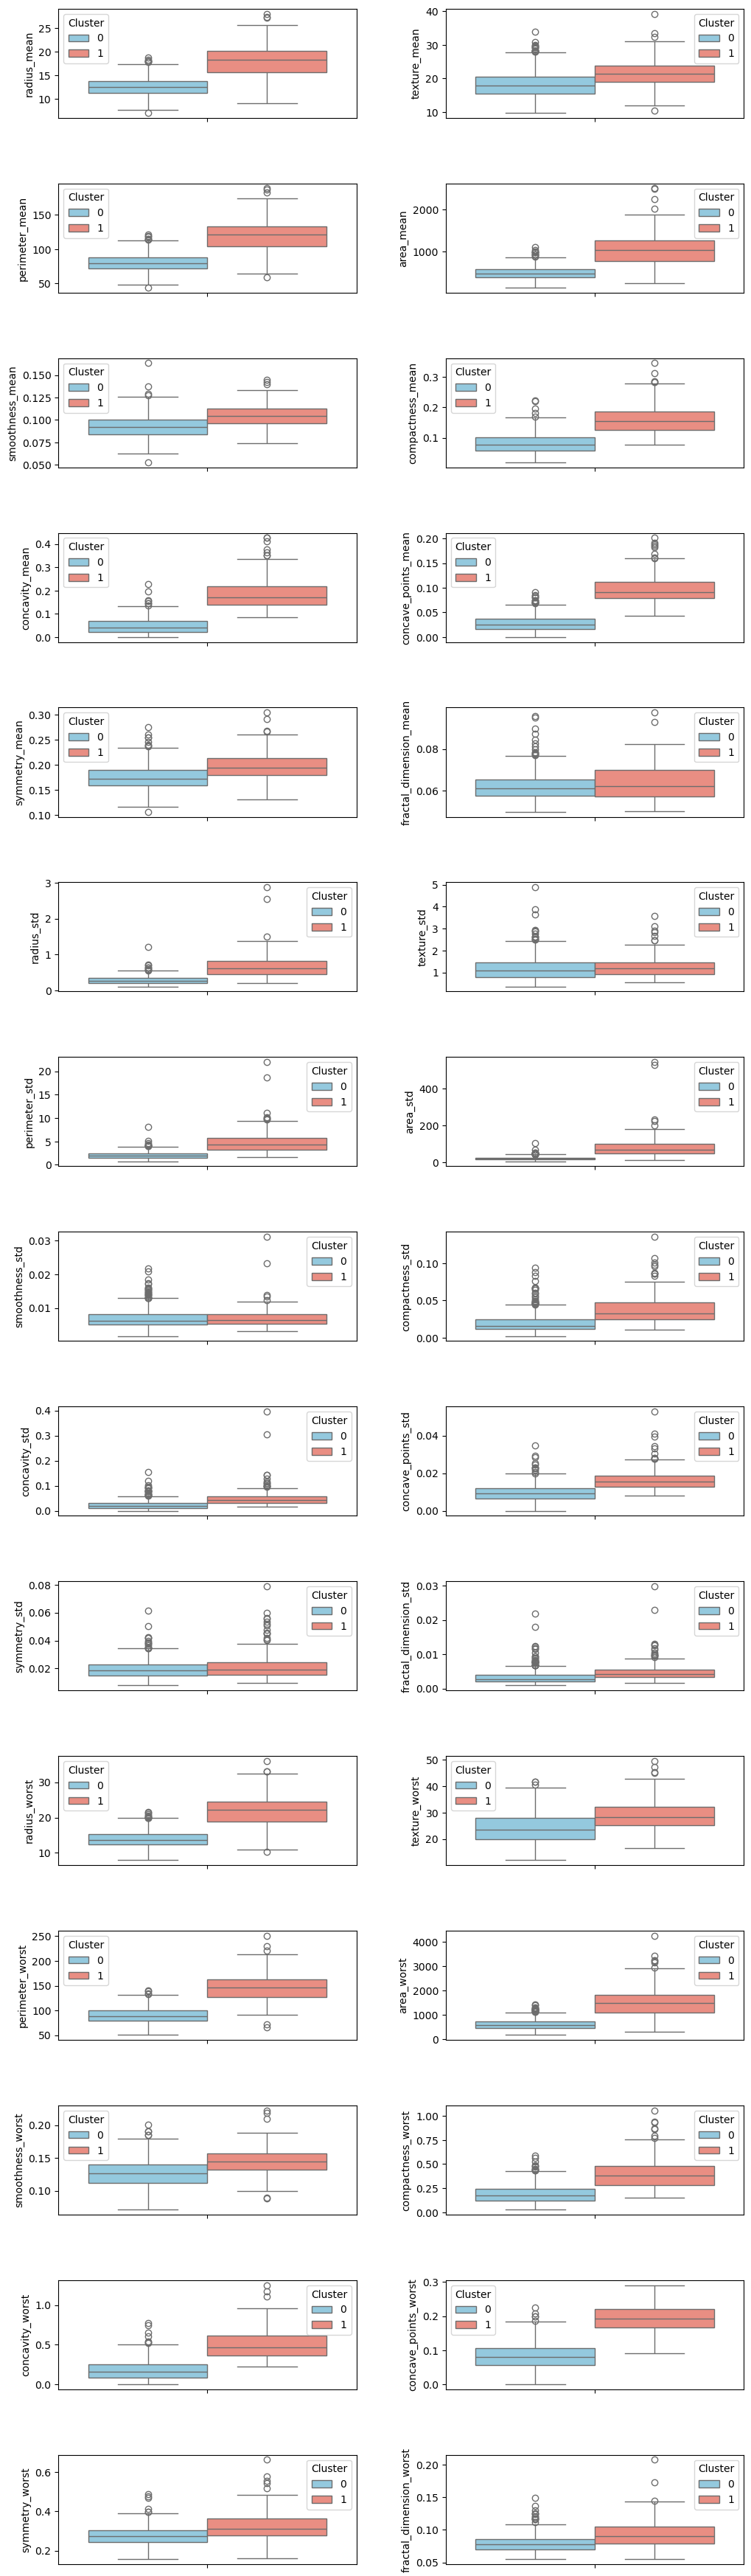

In [142]:
# Analisa boxplot fitur kedua cluster
columns = X.columns

fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel()

for i, column in enumerate(columns):
    sns.boxplot(hue='Cluster',
                y=column,
                data=df_clustered,
                palette=['Skyblue', 'Salmon'], 
                ax=axs[i])
    
plt.show()

Kita bisa melihat kedua cluster memang masih memiliki outlier. Namun kita bisa melihat bahwa rentang nilai cluster 0 lebih rendah daripada rentang nilai cluster 1 yaitu. Ini sesuai dengan hasil penelitian univesity of wisconsin yang menyatakan bahwa nilai yang lebih besar pada pengukuran hasil FNA lebih mengindikasikan class malignant. Dan berdasarkan hasil perbandingan klaster dan label asli juga menunjukan bahwa kebanyakan klaster 1 memiliki label asli malignant.

Untuk mempermudah interpretasi, kita juga akan menghitung jumlah outlier dari kedua klaster menggunakan metode IQR.

In [143]:
outlier_summary = {}

df_cluster_0 = df_clustered[df_clustered['Cluster'] == 0]
df_cluster_1 = df_clustered[df_clustered['Cluster'] == 1]

for column in columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_0 = df_cluster_0[(df_cluster_0[column] < lower_bound) | (df_cluster_0[column] > upper_bound)]
    outliers_1 = df_cluster_1[(df_cluster_1[column] < lower_bound) | (df_cluster_1[column] > upper_bound)]

    outlier_summary[column] = {
        'num_outliers_0': outliers_0.shape[0],
        'num_outliers_1': outliers_1.shape[0]
    }

for column, info in outlier_summary.items():
    print(column)
    print(f"Jumlah outlier cluster - 0: {info['num_outliers_0']}")
    print(f"Jumlah outlier cluster - 1: {info['num_outliers_1']}")
    print("=" * 50 + '\n')

radius_mean
Jumlah outlier cluster - 0: 0
Jumlah outlier cluster - 1: 14

texture_mean
Jumlah outlier cluster - 0: 2
Jumlah outlier cluster - 1: 5

perimeter_mean
Jumlah outlier cluster - 0: 0
Jumlah outlier cluster - 1: 13

area_mean
Jumlah outlier cluster - 0: 0
Jumlah outlier cluster - 1: 25

smoothness_mean
Jumlah outlier cluster - 0: 3
Jumlah outlier cluster - 1: 3

compactness_mean
Jumlah outlier cluster - 0: 0
Jumlah outlier cluster - 1: 16

concavity_mean
Jumlah outlier cluster - 0: 0
Jumlah outlier cluster - 1: 18

concave_points_mean
Jumlah outlier cluster - 0: 0
Jumlah outlier cluster - 1: 10

symmetry_mean
Jumlah outlier cluster - 0: 5
Jumlah outlier cluster - 1: 10

fractal_dimension_mean
Jumlah outlier cluster - 0: 8
Jumlah outlier cluster - 1: 7

radius_std
Jumlah outlier cluster - 0: 1
Jumlah outlier cluster - 1: 37

texture_std
Jumlah outlier cluster - 0: 13
Jumlah outlier cluster - 1: 7

perimeter_std
Jumlah outlier cluster - 0: 1
Jumlah outlier cluster - 1: 37

area_

**Kesimpulan**: Berdasarkan hasil analisa tersebut, kita dapat melihat bahwa jumlah outlier pada fitur-fitur klaster 1 lebih banyak dibandingkan klaster 0. Hanya ada 3 fitur dari klaster 0 yang memiliki jumlah outlier yang lebih banyak daripada fitur klaster 1 yaitu
- texture_std
- smoothness_std
- smoothness_worst

sedangkan 28 fitur lainnya memiliki outlier lebih banyak di klaster 1. Hal ini bisa menunjukan bahwa klaster 1 memiliki nilai ekstrem yang lebih banyak. Ini juga bisa berarti bahwa tumor ganas (malignant) memiliki karaktersitik biologis yang lebih beragam dibanding tumor jinak (benign)